<a href="https://colab.research.google.com/github/SBANTHIYA/Data-Science-and-Analytics-Portfolio/blob/master/Python%3A%20Machine%20Learning%20and%20Deep%20Learning/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**## CAP 5678: ASSIGNMENT 2 : FALL 2020**

**## BY SWATI BANTHIYA**

In this assignment I have attempted to answer all questions as per the guide shared with me on Google Colab. I have attempted to answer all the bonus questions. I have also attempted to use code to make the data neater and more meaningful where required.













In [ ]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from __future__ import division
import seaborn as sns
sns.set(style='ticks', palette='Set2')
%matplotlib inline





In [ ]:
from google.colab import files
files.upload()

Saving salaries.csv to salaries (2).csv


{'salaries.csv': b'earn,height,sex,ed,age,race\r\n50000,74.42443878,male,16,45,white\r\n60000,65.53754283,female,16,58,white\r\n30000,63.62919774,female,16,29,white\r\n50000,63.10856168,female,16,91,other\r\n51000,63.40248357,female,17,39,white\r\n9000,64.39950754,female,15,26,white\r\n29000,61.65632583,female,12,49,white\r\n32000,72.69854374,male,17,46,white\r\n2000,72.03946685,male,15,21,hispanic\r\n27000,72.23493256,male,12,26,white\r\n6530,69.51214643,male,16,65,white\r\n30000,68.03160826,male,11,34,white\r\n12000,67.55693392,male,12,27,white\r\n12000,65.43058708,female,12,51,white\r\n22000,65.66285452,female,16,35,white\r\n17000,67.75876874,male,12,58,white\r\n40000,68.35184258,female,14,29,white\r\n44000,69.6095718,male,13,44,white\r\n7000,64.18456568,female,12,55,black\r\n53000,73.07460915,male,13,35,black\r\n5000,62.37552702,female,13,51,white\r\n14000,63.02393011,female,14,21,white\r\n5500,67.22990391,male,14,22,white\r\n40000,65.5511078,female,12,41,white\r\n34000,72.07964539

In [ ]:
salaries = pd.read_csv('salaries.csv') 

print(salaries.shape)
print(salaries.count())



(1192, 6)
earn      1192
height    1192
sex       1192
ed        1192
age       1192
race      1192
dtype: int64


**Question 1.1**

1.1 Your turn! (2 points)
What is the meaning of each of the six variables/features stored along the columns of the dataset?

Hint: Your solution should have a code cell (2-3 lines of Python) + a text cell (bullet list, explaining the meaning of each variable to the best of your knowledge)

In [ ]:
#Answer 1.1
salaries.head()




,earn,height,sex,ed,age,race
0,50000.0,74.424439,male,16,45,white
1,60000.0,65.537543,female,16,58,white
2,30000.0,63.629198,female,16,29,white
3,50000.0,63.108562,female,16,91,other
4,51000.0,63.402484,female,17,39,white


In [ ]:
salaries.describe(include='all')



,earn,height,sex,ed,age,race
count,1192.000000,1192.000000,1192,1192.000000,1192.000000,1192
unique,NaN,NaN,2,NaN,NaN,4
top,NaN,NaN,female,NaN,NaN,white
freq,NaN,NaN,687,NaN,NaN,989
mean,23154.773490,66.915154,NaN,13.504195,41.378356,NaN
std,19472.296925,3.853968,NaN,2.420175,15.867428,NaN
min,200.000000,57.503219,NaN,3.000000,18.000000,NaN
25%,10000.000000,64.009746,NaN,12.000000,29.000000,NaN
50%,20000.000000,66.451265,NaN,13.000000,38.000000,NaN
75%,30000.000000,69.848100,NaN,16.000000,51.000000,NaN


In [ ]:
# .info gives data type, count of null, row count
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1192 entries, 0 to 1191
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   earn    1192 non-null   float64
 1   height  1192 non-null   float64
 2   sex     1192 non-null   object 
 3   ed      1192 non-null   int64  
 4   age     1192 non-null   int64  
 5   race    1192 non-null   object 
dtypes: float64(2), int64(2), object(2)
memory usage: 56.0+ KB


**Answer 1.1 (contd) Meaning of each variable/feature in the salaries file**

From the first python code .head(),we can see that the salaries file has six columns. There are a total of 1192 instances in each column and there are no null values in any of the columns. 

1. **earn**: Salary of an individual described in floating numbers. It can be assumed to be in USD. It ranges from $200/- to $200,000/-. 

2. **height**: Describes the height in floating type of the individual in inches ranging from 57 inches to 67 inches. 

3. **sex**: Classifies each individual into 2 categories - male or female. 

4. **ed**: This describes the number of years the person has spent in education - school and college. Datatype is integer and the value ranges from 3 to 18 years.

5. **age**: This describes the age of the individual. Integer datatype is being used here and it ranges from 18 years to 91 years old individuals. 

6. **race** : This describes the race of the individual. It is a categorical feature with four unique types.  

**Question 1.2**

1.2 Your turn! (10-14 points)
Write code to:

Display the total headcount and the number (and %) of male and female employees. (2 pts)
Compute and display the min, max, average, and median salary per gender. (8 pts)
(OPTIONAL) Plot meaningful graphs that could provide insight into the gender inequality (if any is present) associated with the salaries in the company. (<= 4 bonus points)

In [ ]:
#Answer to - Display the total headcount and the number (and %) of male and female employees. (2 pts)

df=pd.DataFrame(salaries)
print("--- Employees Gender Details---")
headcount=df['sex'].shape[0]
print("Headcount is ", headcount, " and the breakup in numbers is as follows: ")
df['sex'].value_counts()



--- Employees Gender Details---
Headcount is  1192  and the breakup in numbers is as follows: 


female    687
male      505
Name: sex, dtype: int64

In [ ]:
print("Percentage breakup of gender is as follows")
df['sex'].value_counts(normalize=True)


Percentage breakup of gender is as follows


female    0.576342
male      0.423658
Name: sex, dtype: float64

In [ ]:
#Compute and display the min, max, average, and median salary per gender. (8 pts)

print("------------- Employees Salary Details by Gender---")
print("The following table describes the minimum as 'min', maximum as 'max', average as 'mean' and the median as 'median' SALARY as 'earn' in USD based on gender.")
df.groupby(by='sex').agg({'earn': ['min', 'max', 'mean', 'median']}).unstack().reset_index().rename(columns={'level_0': 'Salary', 'level_1': 'Metric', 'sex': 'gender', 0: 'Calculation_in_USD_Per_Annum'}).round(2)




------------- Employees Salary Details by Gender---
The following table describes the minimum as 'min', maximum as 'max', average as 'mean' and the median as 'median' SALARY as 'earn' in USD based on gender.


,Salary,Metric,gender,Calculation_in_USD_Per_Annum
0,earn,min,female,200.00
1,earn,min,male,1000.00
2,earn,max,female,123000.00
3,earn,max,male,200000.00
4,earn,mean,female,18280.20
5,earn,mean,male,29786.13
6,earn,median,female,15000.00
7,earn,median,male,25000.00


(505, 6)
(687, 6)

------------- EXPLANATION --- ANSWER ------
 

Based on the graph below, it can be seen males(in red), with the same level of experience, generally earn higher than their female(black) counterparts
with similar experience. For example, for the Years of Experience of "4", "6", "7","12","13","15","16","17" and "18", 
the red dot representing male is higher(more salary) than the black dots. The only exception to ths is "10" and "14" years of experience, where the black
# dot is higher than the red dot. 

It can also be seen from the graph below that the inequality increases with the increase in the years of experience. For example, for "18" years of 
# experience, the maximum salary for females is approximately $100,000/- whereas for males it is $200,000/-.

All of the above confirm that gender inequality indeed exists. 




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


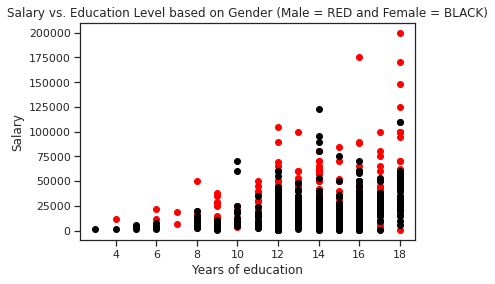

In [ ]:
#Plot meaningful graphs that could provide insight into the gender inequality
# (if any is present) associated with the salaries in the company. (<= 4 bonus points)
df.filter = df[df['sex']=="male"]
print(df.filter.shape)

plt.scatter(df.filter['ed'],df.filter['earn'],color='red')     # RED represents earnings by MALE based on the number of years of experience

df.filter1 = df[df['sex']=="female"]            # # BLACK represents earnings by FEMALE based on the number of years of experience
print(df.filter1.shape)

plt.title('Salary vs. Education Level based on Gender (Male = RED and Female = BLACK)')
plt.ylabel('Salary')
plt.xlabel('Years of education');

plt.scatter(df.filter1['ed'], df.filter1['earn'], color = 'black')


print ('''
------------- EXPLANATION --- ANSWER ------''')

print(''' 

Based on the graph below, it can be seen males(in red), with the same level of experience, generally earn higher than their female(black) counterparts
with similar experience. For example, for the Years of Experience of "4", "6", "7","12","13","15","16","17" and "18", 
the red dot representing male is higher(more salary) than the black dots. The only exception to ths is "10" and "14" years of experience, where the black
# dot is higher than the red dot. 

It can also be seen from the graph below that the inequality increases with the increase in the years of experience. For example, for "18" years of 
# experience, the maximum salary for females is approximately $100,000/- whereas for males it is $200,000/-.

All of the above confirm that gender inequality indeed exists. 

''')





Answer to first hypothesis: H1 : Older employees are paid less (i.e., ageism))

The below graph divides the population by age into 5 categories and is color coded as follows: 
Black=<=30 years,Red=30-40 years, Yellow=40-50 years, Green= 50-60 years, Blue=>60 years.
This is done to understand at around which point can the downward trend be noticed. The red, which is the age group 30-40 years shows the peak of salary.
From that point onwards, the maximum salary drawn by an individual is decreasing. 

Thus, in general, it can be said that older employees are paid less. The hypothesis is confirmed. 


Correlation coefficient of Age and Salary for H1:  0.08100297364190615
(343, 6)
(331, 6)
(217, 6)
(118, 6)
(183, 6)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: Pandas doe

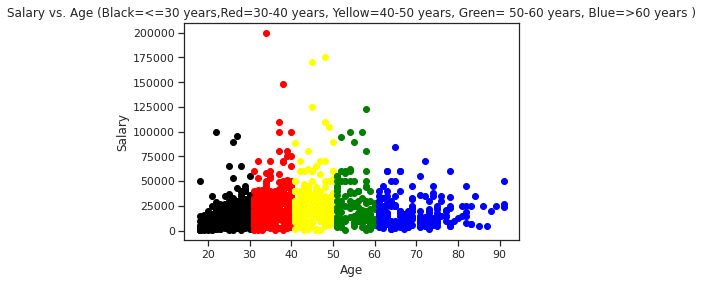

In [ ]:
#Question 1.3

#1.3 Your turn! (18-26 points)
#Write Python code to test hypotheses H1, H2, and H3 (and some text to explain whether they were confirmed or not).

#Feel free to (also) use plots, but make your code independent of a human being interpreting those plots.

#Weight: 18 pts, i.e., 6 pts per hypothesis. Up to 8 bonus points for insightful additional hypotheses, code, and/or comments.

# ANSWER TO FIRST HYPOTHESIS
# H1 : Older employees are paid less (i.e., ageism)
salary = np.array(salaries['earn'])
age = np.array(salaries['age'])

corr, _ = pearsonr(age,salary)
print('''
Answer to first hypothesis: H1 : Older employees are paid less (i.e., ageism))

The below graph divides the population by age into 5 categories and is color coded as follows: 
Black=<=30 years,Red=30-40 years, Yellow=40-50 years, Green= 50-60 years, Blue=>60 years.
This is done to understand at around which point can the downward trend be noticed. The red, which is the age group 30-40 years shows the peak of salary.
From that point onwards, the maximum salary drawn by an individual is decreasing. 

Thus, in general, it can be said that older employees are paid less. The hypothesis is confirmed. 

''')
print("Correlation coefficient of Age and Salary for H1: ",corr)

#   ***Assuming that older here means above 60 years of age *****

df.grp1 = df[df['age']<=30]
df.grp2 = df[(df['age']>30) & (df['age']<=40)]
df.grp3 = df[(df['age']>40) & (df['age']<=50)]
df.grp4 = df[(df['age']>50) & (df['age']<=60)]
df.grp5 = df[df['age']>60]

print(df.grp1.shape)
print(df.grp2.shape)
print(df.grp3.shape)
print(df.grp4.shape)
print(df.grp5.shape)

plt.title('Salary vs. Age (Black=<=30 years,Red=30-40 years, Yellow=40-50 years, Green= 50-60 years, Blue=>60 years )')
plt.ylabel('Salary')
plt.xlabel('Age');

#print("Maximum salary for Grp1: ${:6.2f}".format(df.grp1.max())

plt.scatter(df.grp1['age'], df.grp1['earn'], color = 'black')
plt.scatter(df.grp2['age'], df.grp2['earn'], color = 'red')
plt.scatter(df.grp3['age'], df.grp3['earn'], color = 'yellow')
plt.scatter(df.grp4['age'], df.grp4['earn'], color = 'green')
plt.scatter(df.grp5['age'], df.grp5['earn'], color = 'blue')


Answer to Hypothesis 2
H2: Female employees are paid less (i.e., gender bias)

Salary vs. Education Level based on Gender (Male = RED and Female = BLACK on the plots)

This is looked at with two perspectives - Perspective 1: females are paid less than male counterparts of same AGE
                                       - Perspective 2: females are paid less than male counterparts with same Years of Experience

Studying each graph the following is revealed:

1. Age <30 years : The males (red) is leading for every level of experience, except for 14 years of experience.
2. Age 30-40 years : The males (red) is leading for every level of experience, except for 14,15 and 16 years of experience.
3. Age 40-50 years : Males are leading for every level of experience. 
4. Age 50-60 years : The males (red) is leading for every level of experience, except for 10,12,14,16 and 17 years of experience.
5. Age >60 years: The males (red) is leading for every level of experience, except for 8,10,16 and 18

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: UserWarning: Pandas doe

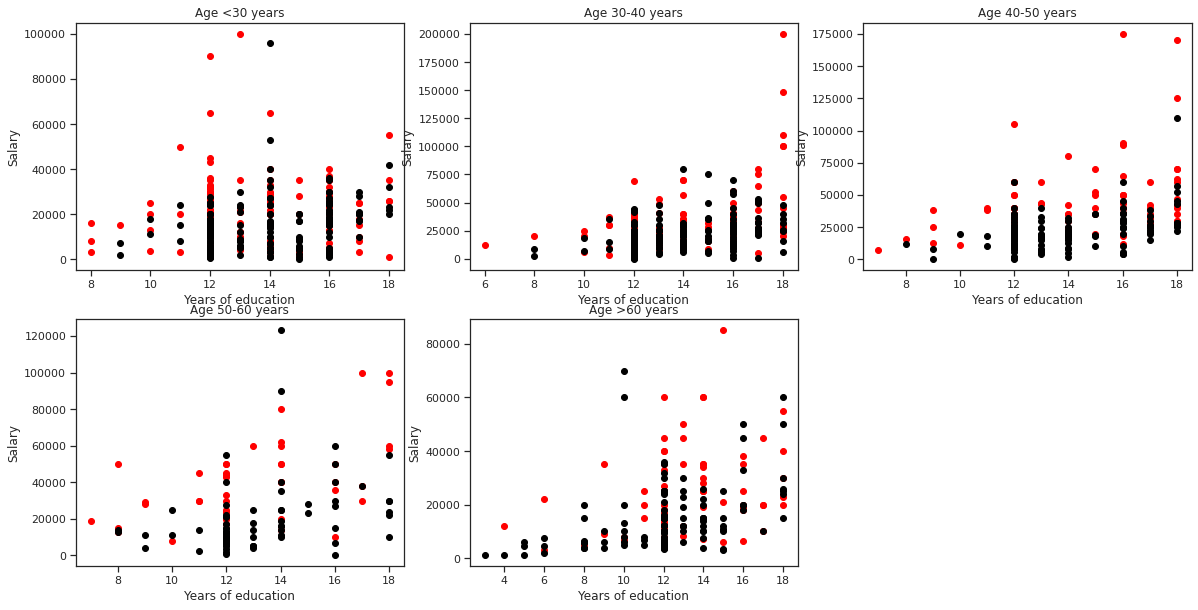

In [ ]:
print('''Answer to Hypothesis 2
H2: Female employees are paid less (i.e., gender bias)

Salary vs. Education Level based on Gender (Male = RED and Female = BLACK on the plots)

This is looked at with two perspectives - Perspective 1: females are paid less than male counterparts of same AGE
                                       - Perspective 2: females are paid less than male counterparts with same Years of Experience

Studying each graph the following is revealed:

1. Age <30 years : The males (red) is leading for every level of experience, except for 14 years of experience.
2. Age 30-40 years : The males (red) is leading for every level of experience, except for 14,15 and 16 years of experience.
3. Age 40-50 years : Males are leading for every level of experience. 
4. Age 50-60 years : The males (red) is leading for every level of experience, except for 10,12,14,16 and 17 years of experience.
5. Age >60 years: The males (red) is leading for every level of experience, except for 8,10,16 and 18 years of experience.

Overall conclusion : While it can be said that gender bias does exist - females are generally paid less than their male counterparts with the
same level of experience, there are some exceptions to this, like when females have around 10 years to 17 years of experience, gender inequality is reduced. 
The fact that the black dots are more spread out --more range-- also means that there is room for females to earn higher. Also, gender bias is less for the
age group 30-40 years, 50-60 years and >60 years compared to the other age groups studied.

The hypothesis is true in general.

                            ''' )

plt.figure(figsize=(20, 10)) 
plt.subplot(2, 3, 1)
df.grp1filter = df.grp1[df.grp1['sex']=="male"]
print(df.grp1filter.shape)

plt.scatter(df.grp1filter['ed'],df.grp1filter['earn'],color='red')     # RED represents earnings by MALE based on the number of years of experience

df.grp1filter1 = df.grp1[df.grp1['sex']=="female"]            # # BLACK represents earnings by FEMALE based on the number of years of experience
print(df.grp1filter1.shape)

plt.title('Age <30 years')
plt.ylabel('Salary')
plt.xlabel('Years of education');

plt.scatter(df.grp1filter1['ed'], df.grp1filter1['earn'], color = 'black')

plt.subplot(2, 3, 2)
df.grp2filter = df.grp2[df.grp2['sex']=="male"]
print(df.grp2filter.shape)

plt.scatter(df.grp2filter['ed'],df.grp2filter['earn'],color='red')     # RED represents earnings by MALE based on the number of years of experience

df.grp2filter1 = df.grp2[df.grp2['sex']=="female"]            # # BLACK represents earnings by FEMALE based on the number of years of experience
print(df.grp2filter1.shape)

plt.title('Age 30-40 years')
plt.ylabel('Salary')
plt.xlabel('Years of education');

plt.scatter(df.grp2filter1['ed'], df.grp2filter1['earn'], color = 'black')

plt.subplot(2, 3, 3)
df.grp3filter = df.grp3[df.grp3['sex']=="male"]
print(df.grp3filter.shape)

plt.scatter(df.grp3filter['ed'],df.grp3filter['earn'],color='red')     # RED represents earnings by MALE based on the number of years of experience

df.grp3filter1 = df.grp3[df.grp3['sex']=="female"]            # # BLACK represents earnings by FEMALE based on the number of years of experience
print(df.grp3filter1.shape)

plt.title('Age 40-50 years')
plt.ylabel('Salary')
plt.xlabel('Years of education');

plt.scatter(df.grp3filter1['ed'], df.grp3filter1['earn'], color = 'black')

plt.subplot(2, 3, 4)
df.grp4filter = df.grp4[df.grp4['sex']=="male"]
print(df.grp4filter.shape)

plt.scatter(df.grp4filter['ed'],df.grp4filter['earn'],color='red')     # RED represents earnings by MALE based on the number of years of experience

df.grp4filter1 = df.grp4[df.grp4['sex']=="female"]            # # BLACK represents earnings by FEMALE based on the number of years of experience
print(df.grp4filter1.shape)

plt.title('Age 50-60 years')
plt.ylabel('Salary')
plt.xlabel('Years of education');

plt.scatter(df.grp4filter1['ed'], df.grp4filter1['earn'], color = 'black')

plt.subplot(2, 3, 5)
df.grp5filter = df.grp5[df.grp5['sex']=="male"]
print(df.grp5filter.shape)

plt.scatter(df.grp5filter['ed'],df.grp5filter['earn'],color='red')     # RED represents earnings by MALE based on the number of years of experience

df.grp5filter1 = df.grp5[df.grp5['sex']=="female"]            # # BLACK represents earnings by FEMALE based on the number of years of experience
print(df.grp4filter1.shape)

plt.title('Age >60 years')
plt.ylabel('Salary')
plt.xlabel('Years of education');

plt.scatter(df.grp5filter1['ed'], df.grp5filter1['earn'], color = 'black')

Hypothesis 3 Answer

#H3: Non-whites are paid less (i.e, race bias).

Looking at the graph and metrics calculations, it can be said that whites (red dots) are earning higher for every level of education except for 
7 years. Another thing to notice is that they are earning a substantial amount more than the non-white category for any level of education. For example, 
looking at the metric calculations, it can be seen that the maximum for a white individual is $200,000/-. The closest counterpart has a salary of $110,000/-.
This is a difference of almost $100,000/-, which shows a high race bias. 

Thus, it can be confirmed that race bias does exist. Hypothesis is true.


(989, 6)
(203, 6)
------------- Employees Salary Details by Race---
The following table describes the minimum as 'min', maximum as 'max', average as 'mean' and the median as 'median' SALARY as 'earn' in USD based on race.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


,Salary,Metric,race,Calculation_in_USD_Per_Annum
0,earn,min,black,600.00
1,earn,min,hispanic,1400.00
2,earn,min,other,3000.00
3,earn,min,white,200.00
4,earn,max,black,60000.00
5,earn,max,hispanic,55000.00
6,earn,max,other,110000.00
7,earn,max,white,200000.00
8,earn,mean,black,19624.21
9,earn,mean,hispanic,18263.64


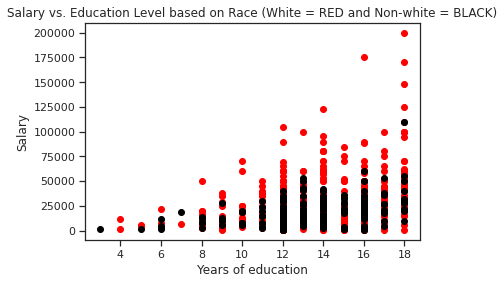

In [ ]:
print('''Hypothesis 3 Answer

#H3: Non-whites are paid less (i.e, race bias).

Looking at the graph and metrics calculations, it can be said that whites (red dots) are earning higher for every level of education except for 
7 years. Another thing to notice is that they are earning a substantial amount more than the non-white category for any level of education. For example, 
looking at the metric calculations, it can be seen that the maximum for a white individual is $200,000/-. The closest counterpart has a salary of $110,000/-.
This is a difference of almost $100,000/-, which shows a high race bias. 

Thus, it can be confirmed that race bias does exist. Hypothesis is true.

''')
df.racefilter = df[df['race']=="white"]
print(df.racefilter.shape)

plt.scatter(df.racefilter['ed'],df.racefilter['earn'],color='red')     # RED represents earnings by WHITE-race based on the number of years of experience

df.racefilter1 = df[df['race']!="white"]            # # BLACK represents earnings by NON-WHITE-race based on the number of years of experience
print(df.racefilter1.shape)

plt.title('Salary vs. Education Level based on Race (White = RED and Non-white = BLACK)')
plt.ylabel('Salary')
plt.xlabel('Years of education');

plt.scatter(df.racefilter1['ed'], df.racefilter1['earn'], color = 'black')

print("------------- Employees Salary Details by Race---")
print("The following table describes the minimum as 'min', maximum as 'max', average as 'mean' and the median as 'median' SALARY as 'earn' in USD based on race.")
df.groupby(by='race').agg({'earn': ['min', 'max', 'mean', 'median']}).unstack().reset_index().rename(columns={'level_0': 'Salary', 'level_1': 'Metric', 'sex': 'gender', 0: 'Calculation_in_USD_Per_Annum'}).round(2)



In [ ]:
# PART 2

# 2.1 Your turn! (10-12 points)
#Write code to:

#Count the number of 3- and 5-cylinder vehicles in the dataset, display the count, and discard those entries (rows). (6 pts)
#Compute and display the min, max, and average fuel consumption (in mpg) for 4-, 6-, and 8-cylinder vehicles. (4 pts)
#(OPTIONAL) Display the name of the most and least fuel efficient vehicles in the dataset (<= 2 points)

data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original",
                   delim_whitespace = True, header=None,
                   names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
                            'model', 'origin', 'car_name'])
print(data.shape)


(406, 9)


In [ ]:
# Data clean-up - drop missing data rows - assuming we are required to this

data.dropna(inplace=True)
data.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


In [ ]:
#shape after dropping 
print(data.shape)


(392, 9)


In [ ]:
#Count of 3- and 5 cylinders
data.groupby(by='cylinders').agg({'car_name':'count'}).rename(columns={'car_name':'Number_of_car_COUNT'})


,Number_of_car_COUNT
cylinders,
3.0,4
4.0,199
5.0,3
6.0,83
8.0,103


In [ ]:
# LIST OF 3-CYLINDER CARS
data.threecylinders= data[(data['cylinders']==3)]
data.threecylinders.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
78,19.0,3.0,70.0,97.0,2330.0,13.5,72.0,3.0,mazda rx2 coupe
118,18.0,3.0,70.0,90.0,2124.0,13.5,73.0,3.0,maxda rx3
250,21.5,3.0,80.0,110.0,2720.0,13.5,77.0,3.0,mazda rx-4
341,23.7,3.0,70.0,100.0,2420.0,12.5,80.0,3.0,mazda rx-7 gs


In [ ]:
## LIST OF 5-CYLINDER CARS
data.fivecylinders= data[(data['cylinders']==5)]

data.fivecylinders.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
281,20.3,5.0,131.0,103.0,2830.0,15.9,78.0,2.0,audi 5000
304,25.4,5.0,183.0,77.0,3530.0,20.1,79.0,2.0,mercedes benz 300d
334,36.4,5.0,121.0,67.0,2950.0,19.9,80.0,2.0,audi 5000s (diesel)


In [ ]:
#ANSWER
#Count the number of 3- and 5-cylinder vehicles in the dataset, display the count, and discard those entries (rows). (6 pts)

print("From the above table it can be seen that there FOUR 3-cylinder cars and THREE 5-cylinder cars. The detailed list is provided above.")

data.filter = data[(data['cylinders']!=3) & (data['cylinders']!=5)]
print(data.filter.shape)
print('''
data.filter contains the new entries with 3 and 5 cylinders discarded - total SEVEN(392-385) entries discarded as confirmed by the 
new shape of the data. This filtered data is used for all future calculations as confirmed by the Professor in Discussion 3''')


From the above table it can be seen that there FOUR 3-cylinder cars and THREE 5-cylinder cars. The detailed list is provided above.
(385, 9)

data.filter contains the new entries with 3 and 5 cylinders discarded - total SEVEN(392-385) entries discarded as confirmed by the 
new shape of the data. This filtered data is used for all future calculations as confirmed by the Professor in Discussion 3


In [ ]:
#ANSWER
#Compute and display the min, max, and average fuel consumption (in mpg) for 4-, 6-, and 8-cylinder vehicles. (4 pts)

print('''
------------- Fuel Consumption Details by number of cylinders---
''')
print("The following table describes the minimum as 'min', maximum as 'max' and average as 'mean' fuel consumption in mpg for 4-, 6- and 8- cylinder vehicles.")
data.filter.groupby(by='cylinders').agg({'mpg': ['min', 'max', 'mean']}).unstack().reset_index().rename(columns={'level_0': 'Fuel Consumption', 'level_1': 'Metric', 'sex': 'gender', 0: 'Fuel_Consumption_in_mpg'}).round(2)


------------- Fuel Consumption Details by number of cylinders---

The following table describes the minimum as 'min', maximum as 'max' and average as 'mean' fuel consumption in mpg for 4-, 6- and 8- cylinder vehicles.


,Fuel Consumption,Metric,cylinders,Fuel_Consumption_in_mpg
0,mpg,min,4.0,18.00
1,mpg,min,6.0,15.00
2,mpg,min,8.0,9.00
3,mpg,max,4.0,46.60
4,mpg,max,6.0,38.00
5,mpg,max,8.0,26.60
6,mpg,mean,4.0,29.28
7,mpg,mean,6.0,19.97
8,mpg,mean,8.0,14.96


In [ ]:
#ANSWER
#(OPTIONAL) Display the name of the most and least fuel efficient vehicles in the dataset (<= 2 points)

print(data.filter[data.filter.mpg == data.filter.mpg.max()]) 
print(data.filter[data.filter.mpg == data.filter.mpg.min()]) 

print('''
The name of the most fuel efficient car is MAZDA GLC and the name of the least efficient vehicle is HI 1200D. The exact row and its 
details are given above''')


      mpg  cylinders  displacement  ...  model  origin   car_name
329  46.6        4.0          86.0  ...   80.0     3.0  mazda glc

[1 rows x 9 columns]
    mpg  cylinders  displacement  ...  model  origin  car_name
34  9.0        8.0         304.0  ...   70.0     1.0  hi 1200d

[1 rows x 9 columns]

The name of the most fuel efficient car is MAZDA GLC and the name of the least efficient vehicle is HI 1200D. The exact row and its 
details are given above


In [ ]:
#2.2. Your turn! (24 points)
#Write Python code to plot the relationship between (8 pts each):

#Fuel consumption and displacement (engine size)
#Fuel consumption and weight
#Fuel consumption and horsepower (HP)

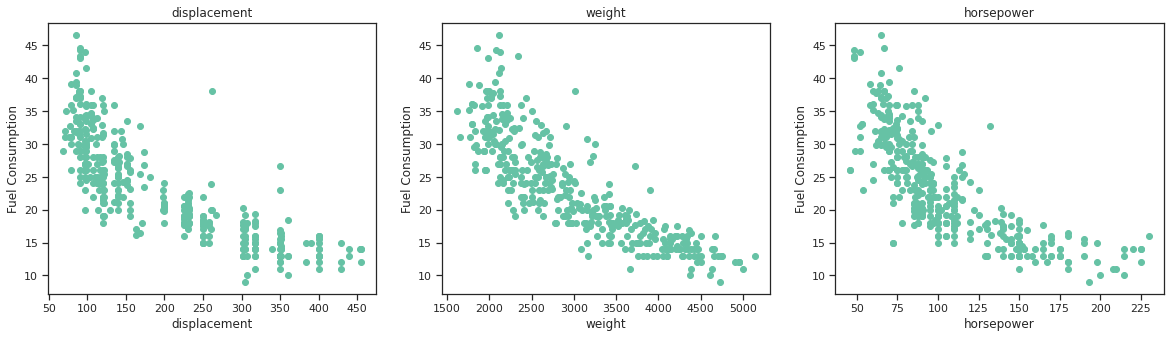

In [ ]:
plt.figure(figsize=(20, 5))

features = ['displacement','weight','horsepower']
target = data.filter['mpg']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = data.filter[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Fuel Consumption')



 The following plot shows 3rd degree polynomial regression between Weight and fuel consumption
 


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


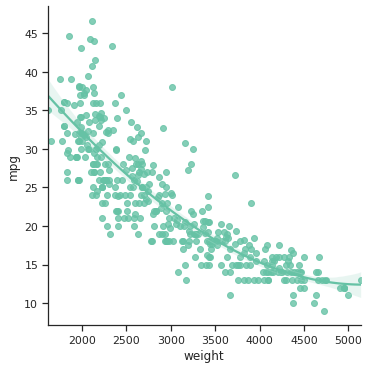

In [ ]:
print('''
 The following plot shows 3rd degree polynomial regression between Weight and fuel consumption
 ''')
sns.lmplot("weight","mpg",data.filter,order=3)


 The following plot shows 3rd degree polynomial regression between Displacement and fuel consumption
 


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


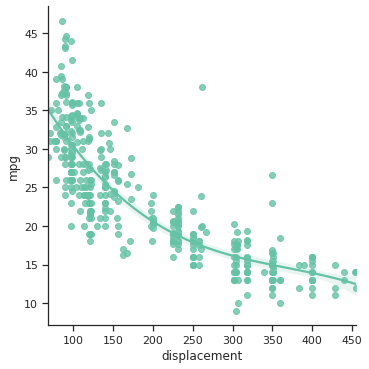

In [ ]:
print('''
 The following plot shows 3rd degree polynomial regression between Displacement and fuel consumption
 ''')
sns.lmplot("displacement","mpg",data.filter,order=3)


 The following plot shows 3rd degree polynomial regression between horsepower and fuel consumption
 


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


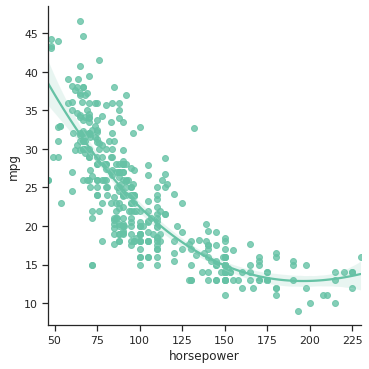

In [ ]:
print('''
 The following plot shows 3rd degree polynomial regression between horsepower and fuel consumption
 ''')
sns.lmplot("horsepower","mpg",data.filter,order=3)

In [ ]:
mpg = np.array(data.filter['mpg'])
displacement = np.array(data.filter['displacement'])
weight = np.array(data.filter['weight'])
horsepower = np.array(data.filter['horsepower'])

corr1, _ = pearsonr(mpg,displacement)
corr2, _ = pearsonr(mpg,weight)
corr3, _ = pearsonr(mpg,horsepower)
print('Correlation coefficient of Fuel consumption and Displacement is: ',corr1)
print('Correlation coefficient of Fuel consumption and weight is: ',corr2)
print('Correlation coefficient of Fuel consumption and horsepower is: ',corr3)

print ('''

PLOT AND CORRELATION EXPLANATION OF THE RELATIONSHIP

All of the three - diplacement (engine size), weight and horsepower (HP) are negatively correlated,
which means fuel consumption goes decreases when the engine size, weight or horsepower is increased. 
However, the strongest negative correlation is with the weight of the car. The lower the weight of the car, the more efficient the fuel consumption.''')

Correlation coefficient of Fuel consumption and Displacement is:  -0.817887362940059
Correlation coefficient of Fuel consumption and weight is:  -0.8426809031318667
Correlation coefficient of Fuel consumption and horsepower is:  -0.7802588157322387


PLOT AND CORRELATION EXPLANATION OF THE RELATIONSHIP

All of the three - diplacement (engine size), weight and horsepower (HP) are negatively correlated,
which means fuel consumption goes decreases when the engine size, weight or horsepower is increased. 
However, the strongest negative correlation is with the weight of the car. The lower the weight of the car, the more efficient the fuel consumption.


In [ ]:
#QUESTION 2.3
#2.3 Your turn! (20-26 points)
#Write Python code to produce (box)plots that should provide good answers to the hypotheses H4 and H5 above (and some text to explain whether they were confirmed or not).

#Weight: 20 pts, i.e., 10 pts per hypothesis. Up to 6 bonus points for insightful additional hypotheses, code, and/or comments.

data.filter['Country_code'] = data.filter.origin.replace([1,2,3],['USA','Europe','Japan'])

data.filter.head()



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name,Country_code
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu,USA
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320,USA
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite,USA
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst,USA
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino,USA


In [ ]:
# Converting data type of Car Model to integer and adding 1900 to it to convert it to a year

convert_dict = {'model': int}
data.filter=data.filter.astype(convert_dict)
data.filter.dtypes
data.filter.model=data.filter.model+1900

In [ ]:
data.filter.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name,Country_code
0,18.0,8.0,307.0,130.0,3504.0,12.0,1970,1.0,chevrolet chevelle malibu,USA
1,15.0,8.0,350.0,165.0,3693.0,11.5,1970,1.0,buick skylark 320,USA
2,18.0,8.0,318.0,150.0,3436.0,11.0,1970,1.0,plymouth satellite,USA
3,16.0,8.0,304.0,150.0,3433.0,12.0,1970,1.0,amc rebel sst,USA
4,17.0,8.0,302.0,140.0,3449.0,10.5,1970,1.0,ford torino,USA


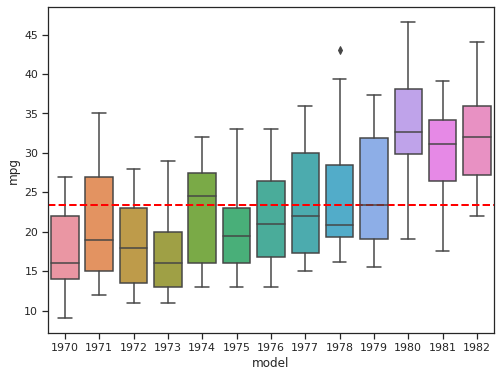

As can be seen from the box plot above, the upward trend confirms that cars are becoming more efficient with time. 
Looking at the median, which is the line which separates each box, it can be noted that the median is also improving getting closer to the thrid quartile. 
For example, in 1979 median was around 23 mpg (1st quartile) while in the year 1982 the median has moved almost to the second quartile at 32 mpg. 
Thus it can be said that on average, the cars fuel performance has improved.


In [ ]:
#ANSWER TO HYPOTHESIS 4
#H4:H4: fuel efficiency improved over the years represented in this dataset (i.e., 1970 through 1982).

data_H4= pd.concat([data.filter['mpg'],data.filter['model']], axis=1)
data_H4

f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x='model', y='mpg', data=data_H4)
plt.axhline(data.filter.mpg.mean(),color='r',linestyle='dashed', linewidth=2)

plt.show()

print('''As can be seen from the box plot above, the upward trend confirms that cars are becoming more efficient with time. 
Looking at the median, which is the line which separates each box, it can be noted that the median is also improving getting closer to the thrid quartile. 
For example, in 1979 median was around 23 mpg (1st quartile) while in the year 1982 the median has moved almost to the second quartile at 32 mpg. 
Thus it can be said that on average, the cars fuel performance has improved.''')


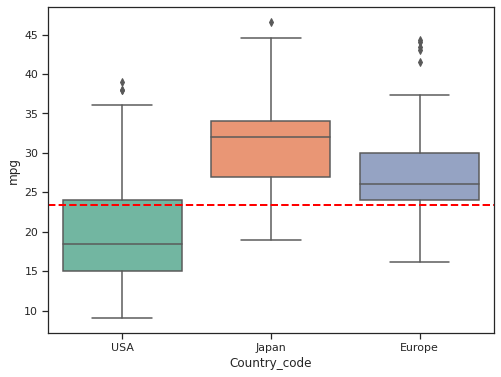

The above plot reveals that Japanese cars are on average more fuel efficient followed by European cars and then American cars based on the 
dataset provided. This can be said by comparing the different values - max, min, median of each of the box plots. It can also be seen that the 
the median for Japanese cars is also higher compared to median of European or US built cars, which means that Japanese cars on average are 
more fuel efficient. The figures displayed in the plot are displayed in numbers below. 


In [ ]:
#ANSWER TO HYPOTHESIS 5
#H5: Japanese cars (within the same time frame) are more fuel efficient than American or European ones.

var='Country_code'
data_H5= pd.concat([data.filter['mpg'],data.filter[var]], axis=1)
data_H5

f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y='mpg', data=data_H5)
plt.axhline(data.filter.mpg.mean(),color='r',linestyle='dashed', linewidth=2)

plt.show()

print('''The above plot reveals that Japanese cars are on average more fuel efficient followed by European cars and then American cars based on the 
dataset provided. This can be said by comparing the different values - max, min, median of each of the box plots. It can also be seen that the 
the median for Japanese cars is also higher compared to median of European or US built cars, which means that Japanese cars on average are 
more fuel efficient. The figures displayed in the plot are displayed in numbers below. ''')

In [ ]:
data.filter.groupby(by='Country_code').agg({'mpg': ['min', 'max', 'mean', 'median']}).unstack().reset_index().rename(columns={'level_0': 'Fuel Consumption', 'level_1': 'Metric',  0: 'Fuel_Consumption_in_mpg'}).round(2)

,Fuel Consumption,Metric,Country_code,Fuel_Consumption_in_mpg
0,mpg,min,Europe,16.20
1,mpg,min,Japan,19.00
2,mpg,min,USA,9.00
3,mpg,max,Europe,44.30
4,mpg,max,Japan,46.60
5,mpg,max,USA,39.00
6,mpg,mean,Europe,27.61
7,mpg,mean,Japan,30.98
8,mpg,mean,USA,20.03
9,mpg,median,Europe,26.00


**Conclusions (16 points)**

Write your conclusions and make sure to address the issues below:

**What have you learned from this assignment?**

I learned how to perform statistics and plotting using python coding. I learned that there are multiple ways of writing a code and tried to use the one that is most simplest and straightforward to read and understand and at the same time give an output that is neat and clear. 

**Which parts were the most fun, time-consuming, enlightening, tedious?**

The most fun part was thinking of the different ways of how I could present the answer and the depth that I could get into for a simple question like proving a hypothesis. For example, for the hypothesis on gender bias, I thought it was interesting to consider the age and years of experience to find out different trends and interesting relationships than simply plot the distribution of female salary versus male salary. This was however time-consuming and tedious. The more in depth I wanted to go, the more lines of code I ended up adding. But it ended up being more enlightening because it made gave a whole new angle to a simple answer. 

**What would you do if you had an additional week to work on this? **

If I had an additional week I would continue to explore the different packages and find out more ways of doing the same thing. For example, I wanted to use pie charts for one of the hypothesis. I thought it would be interesting to bin the data by age and then present the break up of number of individuals who earned a particular salary for males and females. But I was not able to figure out how do the binning. It was not that straight forward. Also, I wanted to get into more depth on answering hypothesis questions by calculating p values like is done in statistics. So I am excited to explore more in the coming weeks.